## **Data Visualization**


In [0]:
#Importing relevant libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from PIL import Image
from wordcloud import WordCloud,ImageColorGenerator
from matplotlib import cm
import os

%matplotlib inline
sns.set_style('whitegrid')
plt.rcParams['patch.force_edgecolor']=True

In [0]:
#Loading csv files from drive

anime = pd.read_csv('/content/drive/My Drive/anime/anime.csv')
reviews = pd.read_csv('/content/drive/My Drive/anime/rating.csv')

In [283]:
#Looking at the contents in ratings.csv file

reviews.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


#### A lot of -1 ratings are found! 
#### -1 ratings are the anime's which were watched by the user and not rated

In [0]:
watched_animes = reviews.replace(to_replace=-1, value=np.nan)

##**Let's take a look at how ratings are distributed**

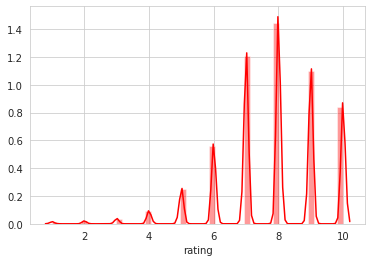

In [285]:
sns.distplot(watched_animes['rating'].dropna(), color='red')

The ratings are centered around 8!

In [286]:
#Looking at the contents in anime.csv file

anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


## **Anime Types**

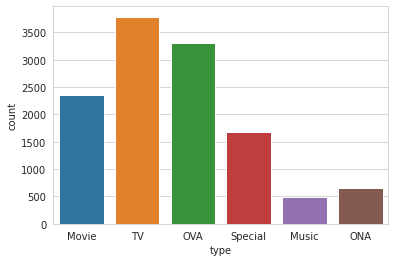

In [287]:
sns.countplot(x='type', data=anime)

So, the type anime data we've got is in the order
*   TV
*   OVA
*   Movie
*   Special
*   ONA
*   Music

So, mainly **TV** and **OVA**!











## **Anime Ratings**

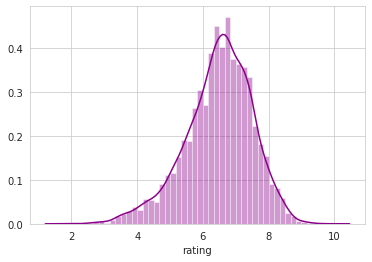

In [288]:
sns.distplot(anime['rating'].dropna(), color='darkmagenta')

As expected (from the ratings database distribution) we have an almost normal distribution of ratings centered on 7. Because these ratings are (probably) mean user ratings for each anime we don't have extreme ratings (10 or 0 ratings).

## **Anime Genre Visualization**

(-0.5, 699.5, 740.5, -0.5)

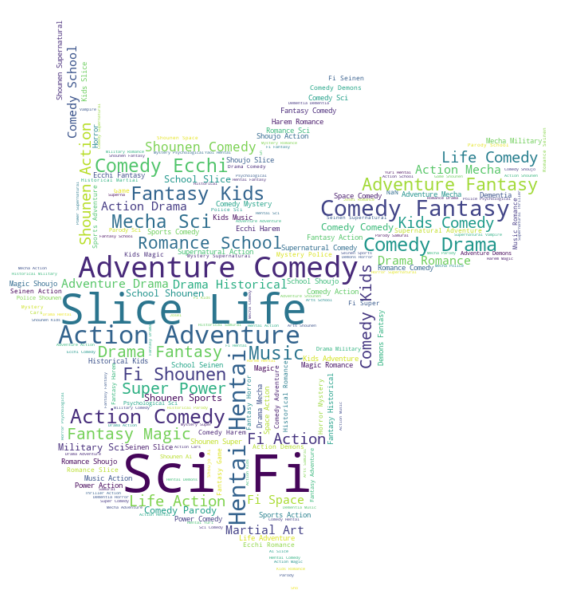

In [297]:
genre_list = anime['genre'].to_string()
pikachu = np.array(Image.open('/content/drive/My Drive/anime/pikachu.jpg'))
wordcloud = WordCloud(background_color="white", mask=pikachu).generate(genre_list)
plt.figure(figsize=(10,20))
plt.imshow(wordcloud, cmap=plt.cm.viridis,interpolation='bilinear')
plt.axis("off")

### Word cloud of **Pikachu!**

<img src="https://drive.google.com/uc?id=1cHH-slj9MHqupkNcoDdCna0Kmiuua3zg">

Pika feels **Sci-Fi** and **Slice of Life** are the most popular animes! 
But we ain't sure..

##**We,ll dummify the Genres for better visualization.**
What's dummify? 
Pandas has a function(get_dummies) which can turn a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.

In [0]:
#splitting the 'genre' column into elements inside a list
genre = anime.genre.str.get_dummies(sep=",")

In [0]:
genre = pd.DataFrame(genre.sum(), index=genre.columns, columns=['Total'])

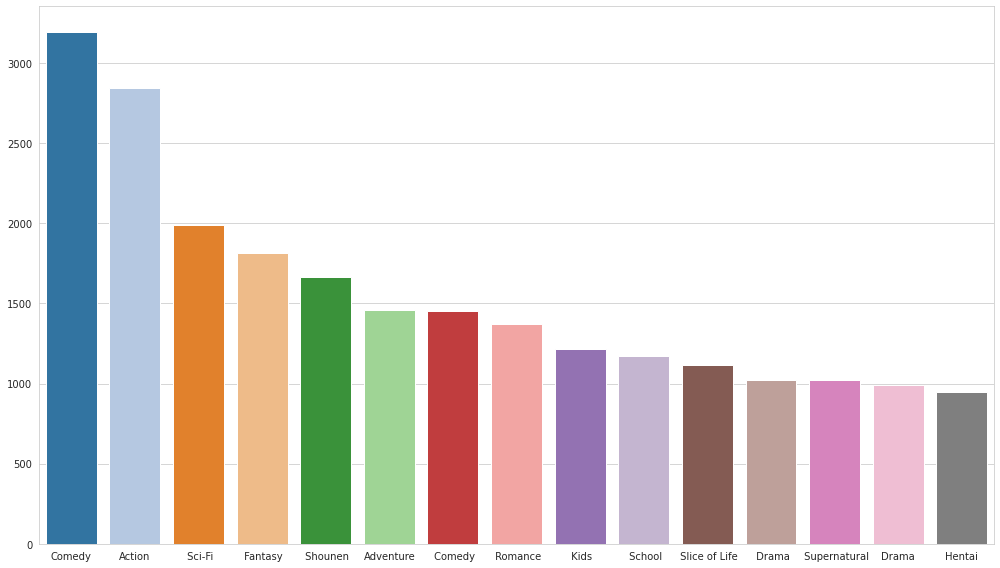

In [301]:
plt.figure(figsize=(14,8))
sns.barplot(data=genre.sort_values(by=['Total'],ascending=False).head(15).T,palette='tab20')
plt.tight_layout()

#### Now, the above graph shows the top 15 Anime Genres in order.
#### Looks like **Comedy** is the most popular, followed by **Action** and **Sci-Fi** and so on!

##**Let's see which anime has maximum number of members!**

In [0]:
maxmembers=anime[anime['members']==max(anime.members)]

In [303]:
maxmembers

,anime_id,name,genre,type,episodes,rating,members
40,1535,Death Note,"Mystery, Police, Psychological, Supernatural, ...",TV,37,8.71,1013917



<img src="https://drive.google.com/uc?id=14bjxeDQwT73hseKFQsHPOoULy4YspjBw" height="500" align="center">



#### **Death Note** is the anime with maximum number of members i.e **1013917** members! with **8.71** rating.

### Now that we've got an idea what our data looks like, let's get to work!
